In [2]:
# Import the required libraries.
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
import seaborn as sn
from collections import deque
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

import math
import pandas as pd


## Approximation

In [3]:
import sys
sys.path.append('/Users/justin/Desktop/Year 4/FYP/Code/main')
from iterative_approximation.Algorithm1 import *

import statistics

from iterative_approximation.Algorithm2 import *
from iterative_approximation.Algorithm2Step import *
from iterative_approximation.Algorithm2StepPruning import *
from iterative_approximation.Algorithm1 import *
import itertools
from utils.generate_groupings import *
import matplotlib.cm as cm

from utils.load_layer_weights_from_txt import *
from utils.save_layer_weight_to_txt import *

In [4]:
lrcn1 = load_model('../model/LRCN_model128___Date_Time_2024_04_19__00_29_50___Loss_0.6276578903198242___Accuracy_0.8484848737716675.keras')


In [5]:
def extract_weight_array(layer):
    kernel, recurrent_kernel = layer.get_weights()

    I = np.hstack([kernel[:, :layer.units].T,recurrent_kernel[:, :layer.units].T])
    F = np.hstack([kernel[:, layer.units:2*layer.units].T,recurrent_kernel[:, layer.units:2*layer.units].T])
    O = np.hstack([kernel[:, 2*layer.units:3*layer.units].T,recurrent_kernel[:, 2*layer.units:3*layer.units].T])
    C = np.hstack([kernel[:, 3*layer.units:].T,recurrent_kernel[:, 3*layer.units:].T])
    return [I,F,O,C]

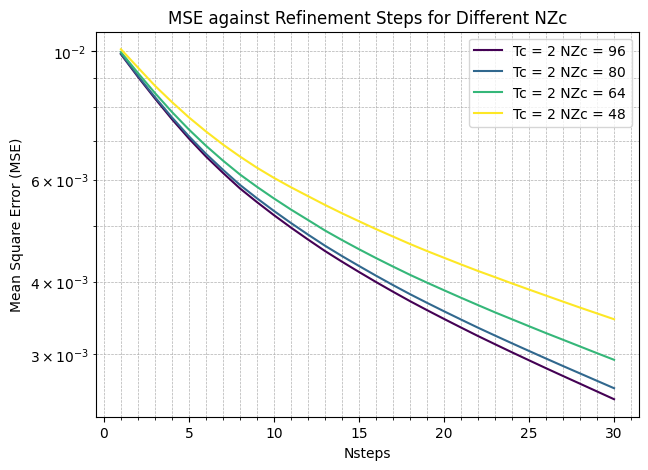

In [28]:
W = extract_weight_array(lrcn1.layers[-2])
W1 = WeightArrayStepPruning(W, 'array', 0.001, 128, 96, 1, 2)
W2 = WeightArrayStepPruning(W, 'array', 0.001, 128, 80, 1, 2)
W3 = WeightArrayStepPruning(W, 'array', 0.001, 128, 64, 1, 2)
W4 = WeightArrayStepPruning(W, 'array', 0.001, 128, 48, 1, 2)

W1_MSE = []
W2_MSE = []
W3_MSE = []
W4_MSE = []

steps = range(1, 31)

colors = cm.viridis(np.linspace(0, 1, 4))

for i in steps:
    W1.iterative_approximation_step1()
    W2.iterative_approximation_step1()
    W3.iterative_approximation_step1()
    W4.iterative_approximation_step1()

    W1_MSE.append(W1.average_mse_array())
    W2_MSE.append(W2.average_mse_array())
    W3_MSE.append(W3.average_mse_array())
    W4_MSE.append(W4.average_mse_array())

# Plotting the results
plt.figure(figsize=(7, 5))
plt.plot(steps, W1_MSE, label='Tc = 2 NZc = 96', color=colors[0])
plt.plot(steps, W2_MSE, label='Tc = 2 NZc = 80', color=colors[1])
plt.plot(steps, W3_MSE, label='Tc = 2 NZc = 64', color=colors[2])
plt.plot(steps, W4_MSE, label='Tc = 2 NZc = 48', color=colors[3])
plt.xlabel('Nsteps')
plt.ylabel('Mean Square Error (MSE)')
plt.yscale('log')
plt.title('MSE against Refinement Steps for Different NZc')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()




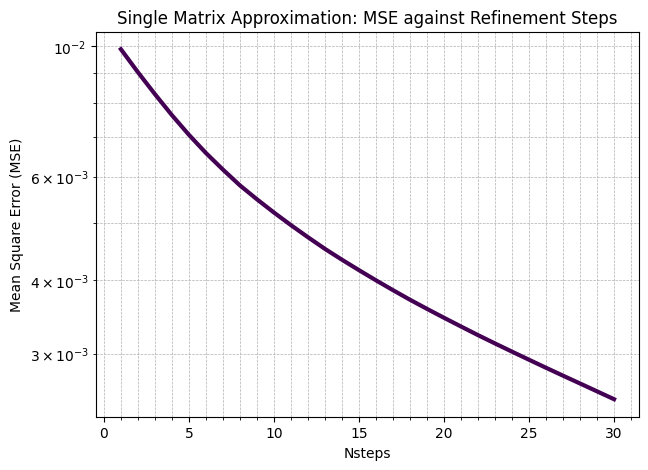

In [36]:
W = extract_weight_array(lrcn1.layers[-2])
W1 = WeightArrayStepPruning(W, 'array', 0.001, 128, 96, 1, 2)

W1_MSE = []

steps = range(1, 31)

colors = cm.viridis(np.linspace(0, 1, 4))

for i in steps:
    W1.iterative_approximation_step1()

    W1_MSE.append(W1.average_mse_array())

# Plotting the results
plt.figure(figsize=(7, 5))
plt.plot(steps, W1_MSE, color=colors[0],linewidth=3)
plt.xlabel('Nsteps')
plt.ylabel('Mean Square Error (MSE)')
plt.yscale('log')
plt.title('Single Matrix Approximation: MSE against Refinement Steps')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()

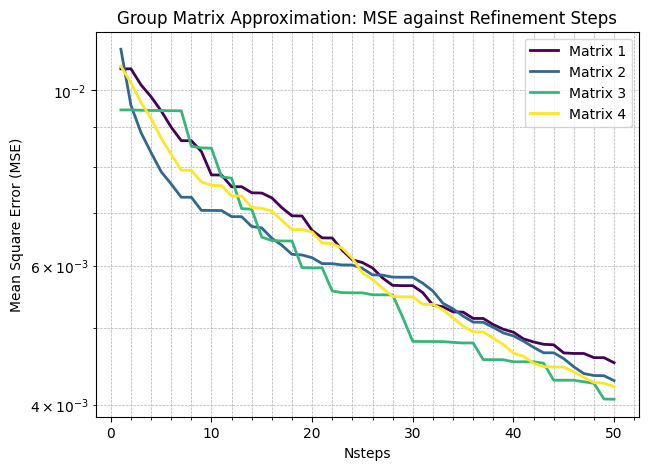

In [39]:
W = extract_weight_array(lrcn1.layers[-2])
W1 = WeightArrayStepPruning(W, 'array', 0.001, 128, 192, 1, 1)

W1_MSE = []
W2_MSE = []
W3_MSE = []
W4_MSE = []

steps = range(1, 51)

colors = cm.viridis(np.linspace(0, 1, 4))

for i in steps:
    WW1 = W1.iterative_approximation_step2()

    W1_MSE.append(mean_square_error_matrix(WW1[0],W[0]))
    W2_MSE.append(mean_square_error_matrix(WW1[1],W[1]))
    W3_MSE.append(mean_square_error_matrix(WW1[2],W[2]))
    W4_MSE.append(mean_square_error_matrix(WW1[3],W[3]))

# Plotting the results
plt.figure(figsize=(7, 5))
plt.plot(steps, W1_MSE, label='Matrix 1', color=colors[0],linewidth=2)
plt.plot(steps, W2_MSE, label='Matrix 2', color=colors[1],linewidth=2)
plt.plot(steps, W3_MSE, label='Matrix 3', color=colors[2],linewidth=2)
plt.plot(steps, W4_MSE, label='Matrix 4', color=colors[3],linewidth=2)
plt.xlabel('Nsteps')
plt.ylabel('Mean Square Error (MSE)')
plt.yscale('log')
plt.title('Group Matrix Approximation: MSE against Refinement Steps')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()

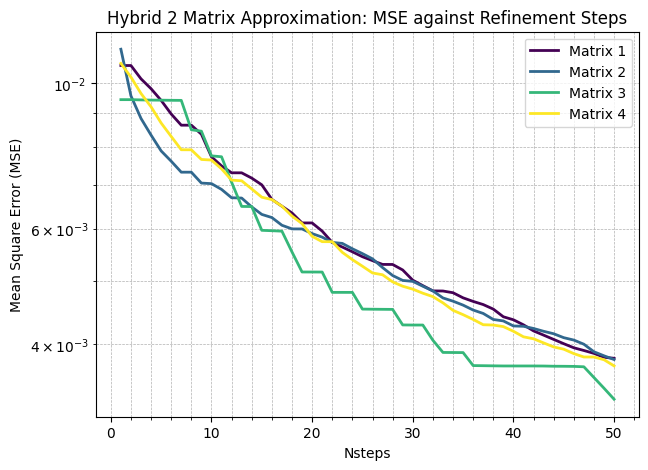

In [65]:
W = extract_weight_array(lrcn1.layers[-2])
W1 = WeightArrayStepPruning(W, 'array', 0.001, 128, 192, 1, 1)

W1_MSE = []
W2_MSE = []
W3_MSE = []
W4_MSE = []

steps = range(1, 51)

colors = cm.viridis(np.linspace(0, 1, 4))

for i in steps:
    WW1 = W1.hybrid_iterative_approximation_step(1)

    W1_MSE.append(mean_square_error_matrix(WW1[0],W[0]))
    W2_MSE.append(mean_square_error_matrix(WW1[1],W[1]))
    W3_MSE.append(mean_square_error_matrix(WW1[2],W[2]))
    W4_MSE.append(mean_square_error_matrix(WW1[3],W[3]))

# Plotting the results
plt.figure(figsize=(7, 5))
plt.plot(steps, W1_MSE, label='Matrix 1', color=colors[0],linewidth=2)
plt.plot(steps, W2_MSE, label='Matrix 2', color=colors[1],linewidth=2)
plt.plot(steps, W3_MSE, label='Matrix 3', color=colors[2],linewidth=2)
plt.plot(steps, W4_MSE, label='Matrix 4', color=colors[3],linewidth=2)
plt.xlabel('Nsteps')
plt.ylabel('Mean Square Error (MSE)')
plt.yscale('log')
plt.title('Hybrid 2 Matrix Approximation: MSE against Refinement Steps')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()

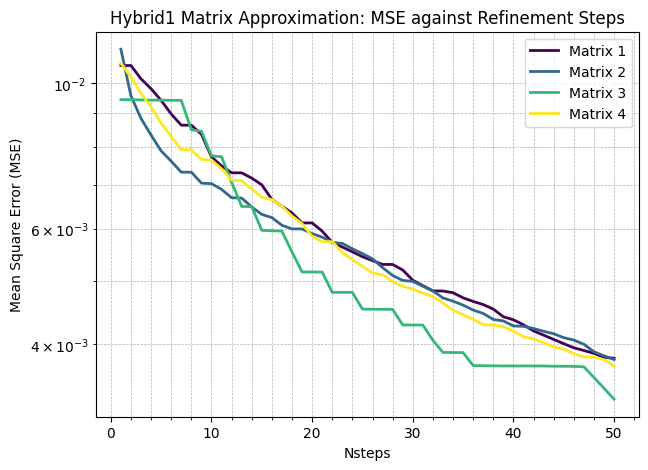

In [43]:
plt.figure(figsize=(7, 5))
plt.plot(steps, W1_MSE, label='Matrix 1', color=colors[0],linewidth=2)
plt.plot(steps, W2_MSE, label='Matrix 2', color=colors[1],linewidth=2)
plt.plot(steps, W3_MSE, label='Matrix 3', color=colors[2],linewidth=2)
plt.plot(steps, W4_MSE, label='Matrix 4', color=colors[3],linewidth=2)
plt.xlabel('Nsteps')
plt.ylabel('Mean Square Error (MSE)')
plt.yscale('log')
plt.title('Hybrid1 Matrix Approximation: MSE against Refinement Steps')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()

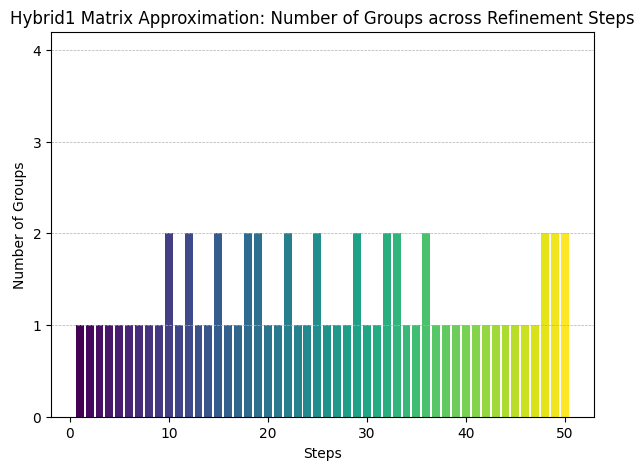

In [68]:
cmap = cm.viridis(np.linspace(0, 1, len(steps)))

plt.figure(figsize=(7,5))

# Create bar plot
bars = plt.bar(steps, W1.num_group, color=cmap)

# Add labels and title
plt.xlabel('Steps')
plt.ylim([0,4.2])
plt.ylabel('Number of Groups')
plt.title('Hybrid1 Matrix Approximation: Number of Groups across Refinement Steps')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

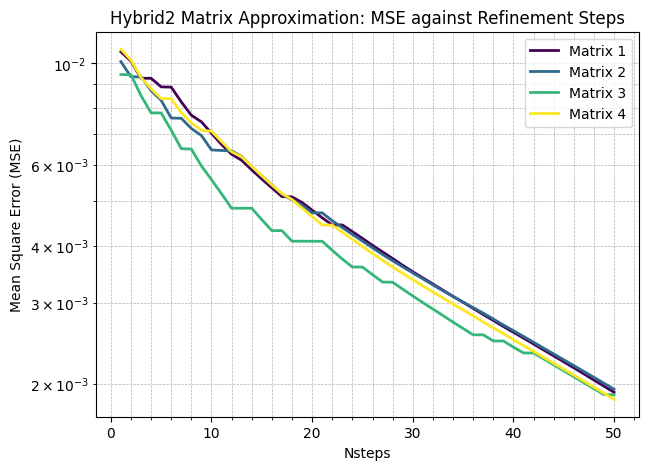

In [48]:
plt.figure(figsize=(7, 5))
plt.plot(steps, W1_MSE, label='Matrix 1', color=colors[0],linewidth=2)
plt.plot(steps, W2_MSE, label='Matrix 2', color=colors[1],linewidth=2)
plt.plot(steps, W3_MSE, label='Matrix 3', color=colors[2],linewidth=2)
plt.plot(steps, W4_MSE, label='Matrix 4', color=colors[3],linewidth=2)
plt.xlabel('Nsteps')
plt.ylabel('Mean Square Error (MSE)')
plt.yscale('log')
plt.title('Hybrid2 Matrix Approximation: MSE against Refinement Steps')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()

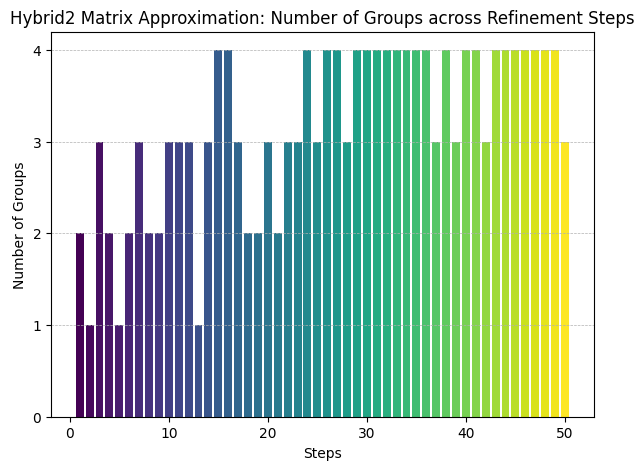

In [52]:
cmap = cm.viridis(np.linspace(0, 1, len(steps)))

plt.figure(figsize=(7,5))

# Create bar plot
bars = plt.bar(steps, W1.num_group, color=cmap)

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Number of Groups')
plt.title('Hybrid2 Matrix Approximation: Number of Groups across Refinement Steps')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

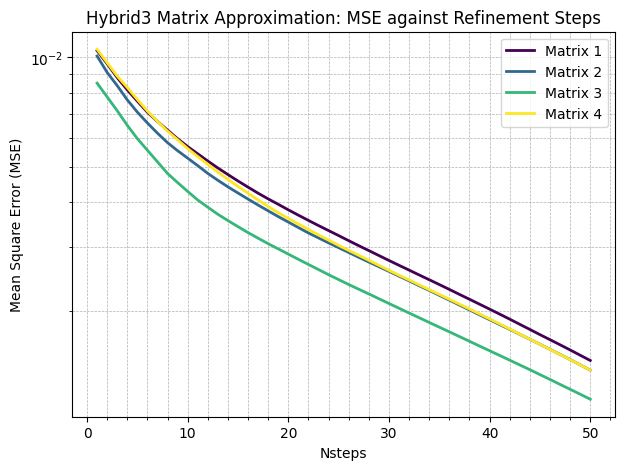

In [59]:
plt.figure(figsize=(7, 5))
plt.plot(steps, W1_MSE, label='Matrix 1', color=colors[0],linewidth=2)
plt.plot(steps, W2_MSE, label='Matrix 2', color=colors[1],linewidth=2)
plt.plot(steps, W3_MSE, label='Matrix 3', color=colors[2],linewidth=2)
plt.plot(steps, W4_MSE, label='Matrix 4', color=colors[3],linewidth=2)
plt.xlabel('Nsteps')
plt.ylabel('Mean Square Error (MSE)')
plt.yscale('log')
plt.title('Hybrid3 Matrix Approximation: MSE against Refinement Steps')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()

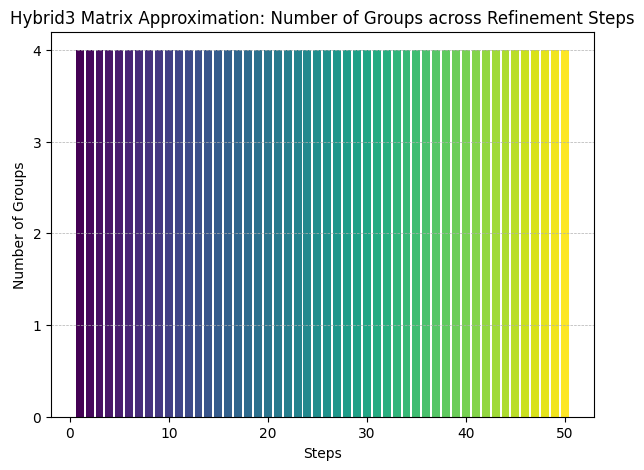

In [60]:
cmap = cm.viridis(np.linspace(0, 1, len(steps)))

plt.figure(figsize=(7,5))

# Create bar plot
bars = plt.bar(steps, W1.num_group, color=cmap)

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Number of Groups')
plt.title('Hybrid3 Matrix Approximation: Number of Groups across Refinement Steps')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

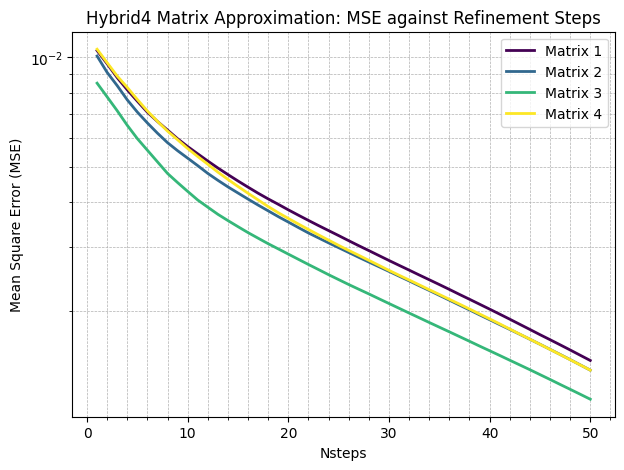

In [61]:
plt.figure(figsize=(7, 5))
plt.plot(steps, W1_MSE, label='Matrix 1', color=colors[0],linewidth=2)
plt.plot(steps, W2_MSE, label='Matrix 2', color=colors[1],linewidth=2)
plt.plot(steps, W3_MSE, label='Matrix 3', color=colors[2],linewidth=2)
plt.plot(steps, W4_MSE, label='Matrix 4', color=colors[3],linewidth=2)
plt.xlabel('Nsteps')
plt.ylabel('Mean Square Error (MSE)')
plt.yscale('log')
plt.title('Hybrid4 Matrix Approximation: MSE against Refinement Steps')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()

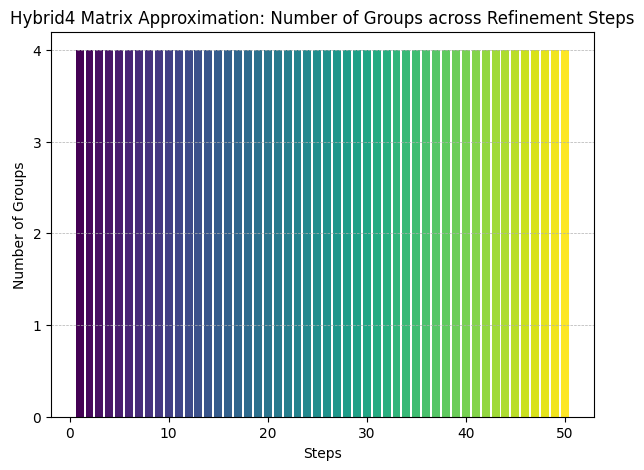

In [62]:
cmap = cm.viridis(np.linspace(0, 1, len(steps)))

plt.figure(figsize=(7,5))

# Create bar plot
bars = plt.bar(steps, W1.num_group, color=cmap)

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Number of Groups')
plt.title('Hybrid4 Matrix Approximation: Number of Groups across Refinement Steps')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

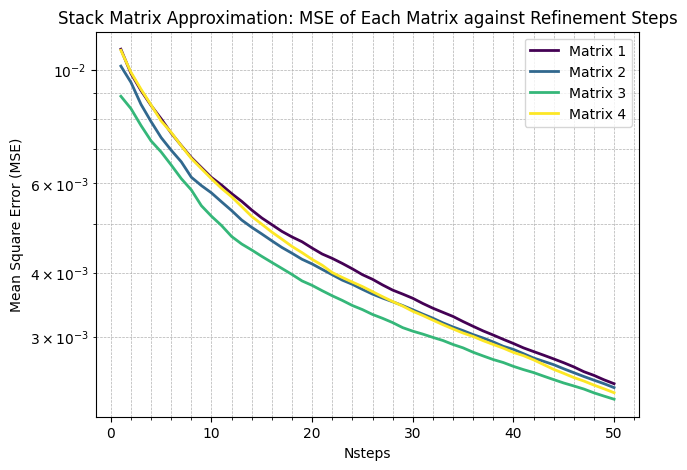

In [40]:
W = extract_weight_array(lrcn1.layers[-2])
W1 = WeightArrayStepPruning(W, 'weight', 0.001, 128, 192, 1, 1)

W1_MSE = []
W2_MSE = []
W3_MSE = []
W4_MSE = []

steps = range(1, 51)

colors = cm.viridis(np.linspace(0, 1, 4))

for i in steps:
    WW1 = W1.iterative_approximation_step3()

    W1_MSE.append(mean_square_error_matrix(WW1[0],W[0]))
    W2_MSE.append(mean_square_error_matrix(WW1[1],W[1]))
    W3_MSE.append(mean_square_error_matrix(WW1[2],W[2]))
    W4_MSE.append(mean_square_error_matrix(WW1[3],W[3]))

# Plotting the results
plt.figure(figsize=(7, 5))
plt.plot(steps, W1_MSE, label='Matrix 1', color=colors[0],linewidth=2)
plt.plot(steps, W2_MSE, label='Matrix 2', color=colors[1],linewidth=2)
plt.plot(steps, W3_MSE, label='Matrix 3', color=colors[2],linewidth=2)
plt.plot(steps, W4_MSE, label='Matrix 4', color=colors[3],linewidth=2)
plt.xlabel('Nsteps')
plt.ylabel('Mean Square Error (MSE)')
plt.yscale('log')
plt.title('Stack Matrix Approximation: MSE of Each Matrix against Refinement Steps')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()

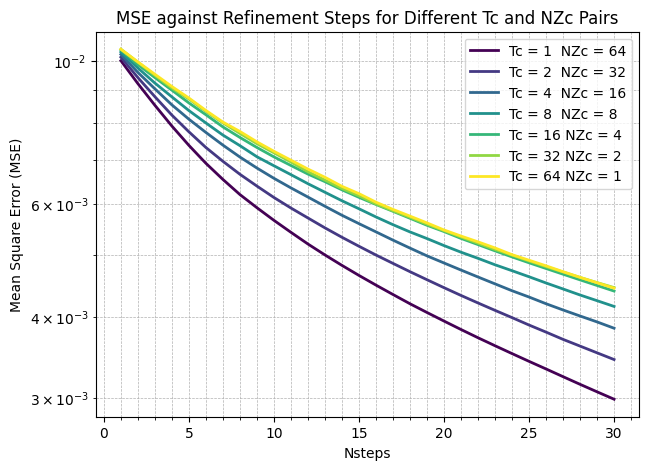

In [63]:
W = extract_weight_array(lrcn1.layers[-2])
W1 = WeightArrayStepPruning(W, 'array', 0.001, 64, 192, 1, 1)
W2 = WeightArrayStepPruning(W, 'array', 0.001, 32, 192, 2, 1)
W3 = WeightArrayStepPruning(W, 'array', 0.001, 16, 192, 4, 1)
W4 = WeightArrayStepPruning(W, 'array', 0.001, 8, 192, 8, 1)
W5 = WeightArrayStepPruning(W, 'array', 0.001, 4, 192, 16, 1)
W6 = WeightArrayStepPruning(W, 'array', 0.001, 2, 192, 32, 1)
W7 = WeightArrayStepPruning(W, 'array', 0.001, 1, 192, 64, 1)

W1_MSE = []
W2_MSE = []
W3_MSE = []
W4_MSE = []
W5_MSE = []
W6_MSE = []
W7_MSE = []

steps = range(1, 31)

colors = cm.viridis(np.linspace(0, 1, 7))

for i in steps:
    W1.iterative_approximation_step1()
    W2.iterative_approximation_step1()
    W3.iterative_approximation_step1()
    W4.iterative_approximation_step1()
    W5.iterative_approximation_step1()
    W6.iterative_approximation_step1()
    W7.iterative_approximation_step1()

    W1_MSE.append(W1.average_mse_array())
    W2_MSE.append(W2.average_mse_array())
    W3_MSE.append(W3.average_mse_array())
    W4_MSE.append(W4.average_mse_array())
    W5_MSE.append(W5.average_mse_array())
    W6_MSE.append(W6.average_mse_array())
    W7_MSE.append(W7.average_mse_array())


# Plotting the results
plt.figure(figsize=(7, 5))
plt.plot(steps, W1_MSE, label='Tc = 1  NZc = 64', color=colors[0],linewidth=2)
plt.plot(steps, W2_MSE, label='Tc = 2  NZc = 32', color=colors[1],linewidth=2)
plt.plot(steps, W3_MSE, label='Tc = 4  NZc = 16', color=colors[2],linewidth=2)
plt.plot(steps, W4_MSE, label='Tc = 8  NZc = 8', color=colors[3],linewidth=2)
plt.plot(steps, W5_MSE, label='Tc = 16 NZc = 4', color=colors[4],linewidth=2)
plt.plot(steps, W6_MSE, label='Tc = 32 NZc = 2', color=colors[5],linewidth=2)
plt.plot(steps, W7_MSE, label='Tc = 64 NZc = 1', color=colors[6],linewidth=2)
plt.xlabel('Nsteps')
plt.ylabel('Mean Square Error (MSE)')
plt.yscale('log')
plt.title('MSE against Refinement Steps for Different Tc and NZc Pairs')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()


